# Fordgobike-trip-data

## Analysis by Sushmita Pandit
FordGoBike Project Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. By the end of 2018, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.is the Bay Area's new bike share system, with thousands of public bikes for use across the greater San Francisco Bay area. An app was also created to co-piloting for getting around town. Ford has also introduced an ebike called Ford GoBike Plus on April 24th 2018 which is a motorized bike rides. We assume that this would attract more people to ride the bikes without breaking a sweat. For more information on this program, please go to https://www.fordgobike.com 

# Dataset Overview
FordGoBike_Trip_Data_exploratoryAnalysis - covers data from 1st of January 2018 till December 31st 2018 (2018-fordgobike-tripdata.csv). I [**uploaded**](https://s3.amazonaws.com/baywheels-data/index.html) each months data from January till December and then appended whole of the data into one dataframe **"2018-fordgobike-tripdata.csv"**.



# Investigative Overview
####  I have Analysed following questions 
1. How is the distribution of various trip duration?
2. How is the trend month wise and which month saw long trip durations?
3. How is the trip duration season wise?
4. How is the distribution of user type that is customer and susbcriber?
5. How is the Average byke ride duration in 2018?
6. How is the byke ride usage month wise in 2018?
7. How are the byke usage hour wise, like when are the busiest hours of the day?
8. How long is the usage during weekdays?
9. How is the usage by memeber age group?
10. How was the monthly trend with respect to age group and subscribers user group?
11. How is the usage of byke service (duration in minute) by user_type and Gender wise?

## Preliminary wrangling

In [1]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading in the dataset into a pandas dataframe, print statistics
jan = pd.read_csv('201801-fordgobike-tripdata.csv')
feb = pd.read_csv('201802-fordgobike-tripdata.csv')
mar = pd.read_csv('201803-fordgobike-tripdata.csv')
apr = pd.read_csv('201804-fordgobike-tripdata.csv')
may = pd.read_csv('201805-fordgobike-tripdata.csv')
jun = pd.read_csv('201806-fordgobike-tripdata.csv')
jul = pd.read_csv('201807-fordgobike-tripdata.csv')
aug = pd.read_csv('201808-fordgobike-tripdata.csv')
sep = pd.read_csv('201809-fordgobike-tripdata.csv')
oct = pd.read_csv('201810-fordgobike-tripdata.csv')
nov = pd.read_csv('201811-fordgobike-tripdata.csv')
dec = pd.read_csv('201812-fordgobike-tripdata.csv')

In [3]:
#appending all the months data into one file.
bykeride = jan.append(feb).append(mar).append(apr).append(may).append(jun).append(jul).append(aug).append(sep).append(oct).append(nov).append(dec)

In [4]:
# saving into csv file
bykeride.to_csv('2018-fordgobike-tripdata.csv', encoding='utf-8', index=False)

#loading the complete data into data frame
fordbyke = pd.read_csv('2018-fordgobike-tripdata.csv')


In [5]:
# high-level overview of data shape and composition
print(fordbyke.shape)
print(fordbyke.dtypes)
print(fordbyke.head(10))

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:

In [6]:
#checking for duplicated data
fordbyke.duplicated().sum()

0

In [7]:
#checking for missing data
fordbyke.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

### What is the structure of the dataset?
There are 1863721 trips in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). Most variables are numeric in nature, but the variables start_station_name, end_station_name, and user_type are string type.
### What is/are the main feature(s) of interest in the dataset?
I'm most interested in figuring out what features are best for predicting the busiest time of the day, week and Month. Also user category wise , Gender wise who is ahead in utilising this service?
### Which features in the dataset will help support  investigation into feature(s) of interest?
I expect that start_time,end_time,start_station_name,end_station_name,user_type will have the strongest effect on finding the busiest time of the day,week,month. Features such user_type , memeber_gender would further help to reveal other insights from the data.


# Data Cleaning

In [8]:
#changing the data type for start_time and end_time
fordbyke['start_time']=pd.to_datetime(fordbyke['start_time'])
fordbyke['end_time']=pd.to_datetime(fordbyke['end_time'])

In [9]:
fordbyke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 227.5+ MB


In [10]:
# descriptive statistics for numeric variables
print(fordbyke.describe())

       duration_sec  start_station_id  start_station_latitude  \
count  1.863721e+06      1.851950e+06            1.863721e+06   
mean   8.573026e+02      1.196744e+02            3.776678e+01   
std    2.370379e+03      1.003976e+02            1.057689e-01   
min    6.100000e+01      3.000000e+00            3.726331e+01   
25%    3.500000e+02      3.300000e+01            3.777106e+01   
50%    5.560000e+02      8.900000e+01            3.778107e+01   
75%    8.720000e+02      1.860000e+02            3.779625e+01   
max    8.636600e+04      3.810000e+02            4.551000e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.863721e+06    1.851950e+06          1.863721e+06   
mean             -1.223492e+02    1.181730e+02          3.776690e+01   
std               1.654634e-01    1.004403e+02          1.056483e-01   
min              -1.224737e+02    3.000000e+00          3.726331e+01   
25%              -1.224114e+02    3.000000e+01        

In [11]:
fordbyke['start_time_date']=fordbyke['start_time'].dt.date #extracting date values from start_time
fordbyke['end_time_date']=fordbyke['end_time'].dt.date #extracting date values from end_time

In [12]:
fordbyke['start_time_year_month']=fordbyke['start_time'].map(lambda x: x.strftime('%Y-%m')) #extracting year and month values from start_time
fordbyke['end_time_year_month']=fordbyke['end_time'].map(lambda x: x.strftime('%Y-%m')) ##extracting year and month values from end_time

In [13]:
fordbyke['start_time_year']=fordbyke['start_time'].dt.year.astype(int) #extracting year values from start_time
fordbyke['end_time_year']=fordbyke['end_time'].dt.year.astype(int) #extracting year values from end_time

In [14]:
fordbyke['st_month']=fordbyke['start_time'].dt.month.astype(int) #extracting month values from start_time and changing datatype to int
fordbyke['et_month']=fordbyke['end_time'].dt.month.astype(int) #extracting month values from end_time and changing datatype to int

In [15]:
fordbyke['st_weekday']=fordbyke['start_time'].dt.weekday_name #extracting weekday values from start_time 
fordbyke['et_weekday']=fordbyke['end_time'].dt.weekday_name #extracting weekday values from end_time 

In [16]:
fordbyke['st_hour']=fordbyke['start_time'].dt.hour #extracting hour values from start_time 
fordbyke['et_hour']=fordbyke['end_time'].dt.hour #extracting hour values from end_time 

In [17]:
fordbyke['member_age'] = 2019-fordbyke['member_birth_year'] # calculating the member age and adding it to new column member_age

In [18]:
fordbyke['member_age']=fordbyke['member_age'].fillna(0) # replacing nulls with 0
fordbyke['member_age']=fordbyke['member_age'].astype('int') # changing the member_age to int data type

In [19]:
fordbyke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 29 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
start_time_date            object
end_time_date              object
start_time_year_month      object
end_time_year_month        object
start_time_year            int64
end_time_year              int64
st_month                   int64
et_month                   int64
st_weekday                 object
et_weekday          

In [20]:
#creating age bins
fordbyke['age_bin'] = fordbyke['member_age'].apply(lambda x: '0 - 10'if 0<=x<=10
                                                  else '10 - 20' if 10<x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                  else 'greater than 60')

In [21]:
fordbyke.describe()# checking out all the newly created numeric columns 

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_time_year,end_time_year,st_month,et_month,st_hour,et_hour,member_age
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06,1863721.0,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03,2018.0,2.018000e+03,6.928460e+00,6.928446e+00,1.351437e+01,1.368369e+01,3.377861e+01
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01,0.0,3.020175e-03,3.118673e+00,3.118700e+00,4.742223e+00,4.765851e+00,1.321512e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03,2018.0,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03,2018.0,2.018000e+03,5.000000e+00,5.000000e+00,9.000000e+00,9.000000e+00,2.700000e+01
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03,2018.0,2.018000e+03,7.000000e+00,7.000000e+00,1.400000e+01,1.400000e+01,3.300000e+01
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03,2018.0,2.018000e+03,1.000000e+01,1.000000e+01,1.700000e+01,1.800000e+01,4.000000e+01
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03,2018.0,2.019000e+03,1.200000e+01,1.200000e+01,2.300000e+01,2.300000e+01,1.380000e+02


## Exploratory Data Analysis
### How is the distribution of various trip duration?

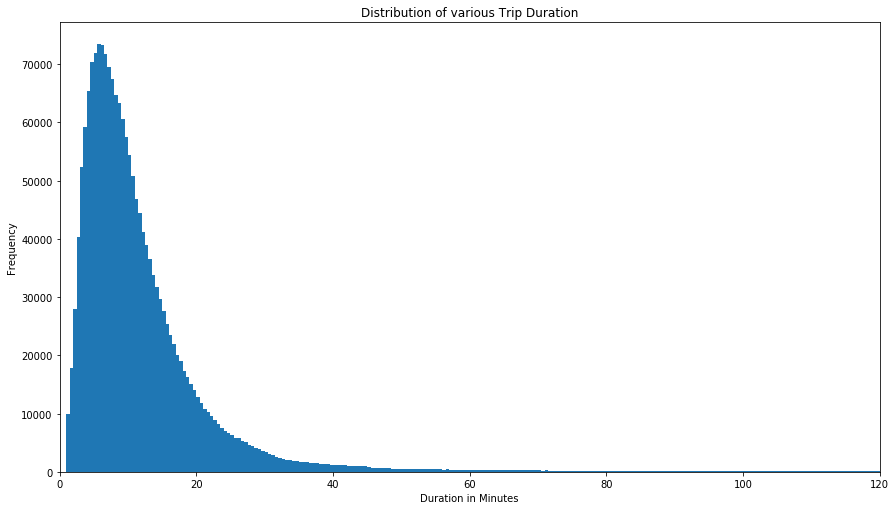

In [22]:
#calculating duration in minutes and dropping the duration_sec column

fordbyke['duration_min'] = fordbyke['duration_sec'] / 60 
fordbyke.drop('duration_sec' , axis = 1 , inplace = True)

binedges = np.arange(0, fordbyke['duration_min'].max() + 0.5 , 0.5)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = fordbyke , x = 'duration_min' , bins = binedges)
plt.xlim(0,120)
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.savefig('1.1.png')

**We could see that the the above plot is right-screwed, with a long tail on the right. The next step is to apply a logarithmic transformation to x-axis.**

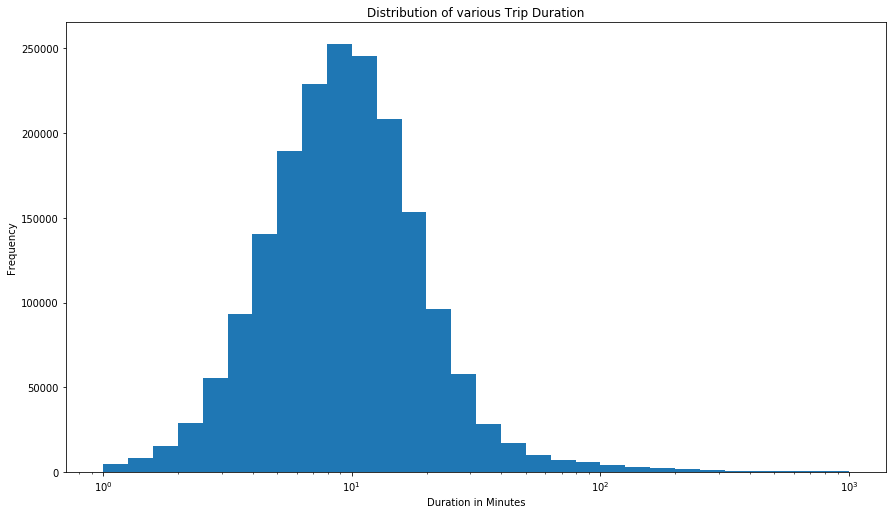

In [23]:

#distribution of various trip durations
plt.figure(figsize=[14.70, 8.27])
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = fordbyke , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');
plt.savefig('1_Distribution_of_various_Trip_Duration.png')

**We could see from the above plot that majority of the rides are around 10 minutes of duration.**

In [24]:
#ordering the days of the week from Monday to Sunday and ordering the age bins
ordinal_var_dict = {'st_weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'age_bin':['0 - 10','10 - 20','21 - 30','31 - 40','41 - 50','51 - 60','greater than 60']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordbyke[var] = fordbyke[var].astype(ordered_var)

In [25]:
fordbyke.st_weekday.head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: st_weekday, dtype: category
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

## How is the trend month wise and which month saw long trip durations?

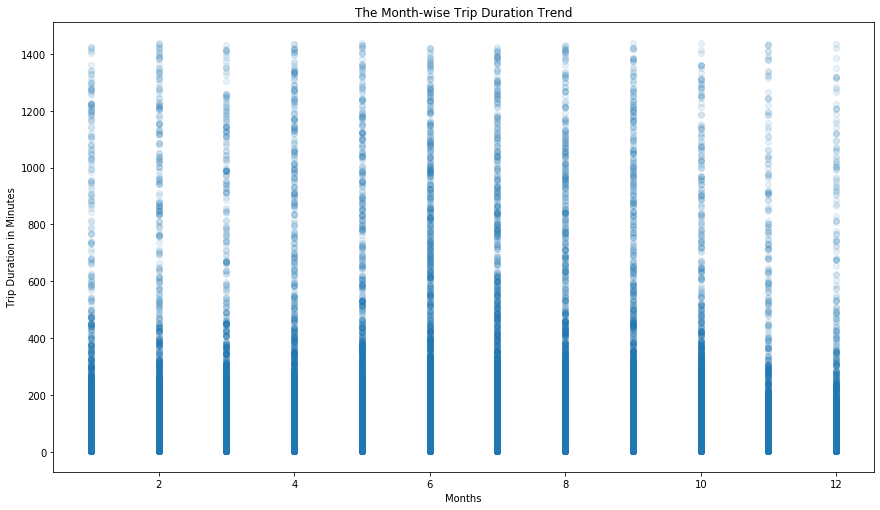

In [26]:
plt.figure(figsize=[14.70, 8.27]) # Makes the figure enlarged for better visualization 
plt.scatter(data = fordbyke , x = 'st_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Month-wise Trip Duration Trend')
plt.xlabel('Months')
plt.ylabel('Trip Duration in Minutes')
plt.savefig('2_Month-wise_Trip_Duration_Trend.png')

**Months like June July August has seen the highest usage as well as usage for longer durations**

## How is the trip duration season wise?

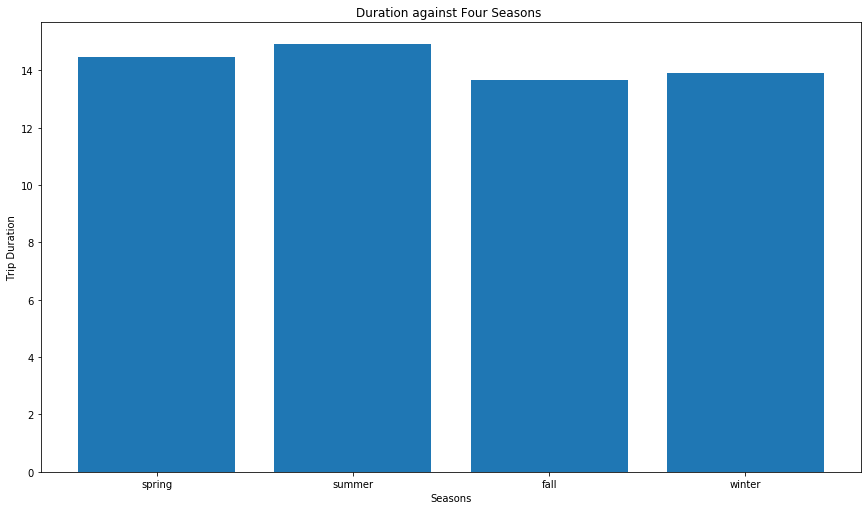

In [27]:
# We categorize our 4 seasons categories
spring = fordbyke.query('st_month in ["3" , "4" , "5"]' ).duration_min.mean ()
summer = fordbyke.query('st_month in ["6" , "7" , "8"] ').duration_min.mean()
fall = fordbyke.query('st_month in ["9" , "10" , "11"] ').duration_min.mean()
winter = fordbyke.query('st_month in ["12" , "1" , "2"]' ).duration_min.mean()

#Distribution by seasons of the year
plt.figure(figsize=[14.70, 8.27])
plt.bar(['spring','summer','fall','winter'],[spring , summer , fall , winter] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');
plt.savefig('3_Duration_against_Four_Seasons.png')

**If we see the bike usage trend season wise certainly its more popular in spring and summer seasons**

## How is the distribution of user type that is customer and susbcriber?

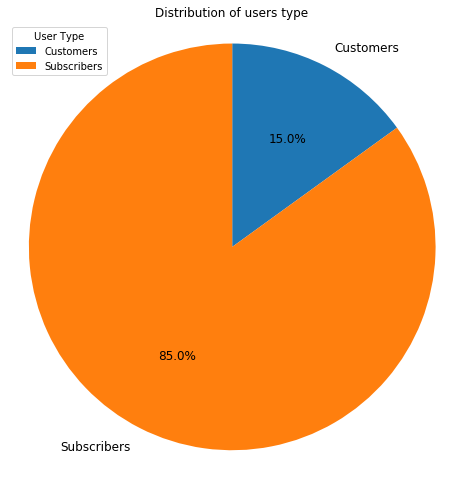

In [28]:
#Analysing distribution by user_type
user_type1 = fordbyke['user_type'].value_counts()
sizes1 = [user_type1['Customer']/user_type1.sum()*100, user_type1['Subscriber']/user_type1.sum()*100]
labels1 = ['Customers', 'Subscribers']

#plt.subplot(1,2,1)
plt.figure(figsize=[14.70, 8.27])
patches, texts, autotexts =plt.pie(sizes1, labels=labels1, startangle=90, autopct='%1.1f%%', counterclock=False);
autotexts[0].set_fontsize(12)
autotexts[1].set_fontsize(12)
texts[0].set_fontsize(12)
texts[1].set_fontsize(12)
plt.axis('square')
plt.legend(patches,labels1,title='User Type')
plt.title('Distribution of users type')
plt.savefig('4_customerSubscriberDistribution.png')

**Usage user wise shows that 85% of the users are subscribers and rest are new customers. It shows that once people subscribe they certainly try to use their subscription. These plot also shows that there are pretty good chances of a customer turning into subscriber.**

## How is the Average byke ride duration in 2018?

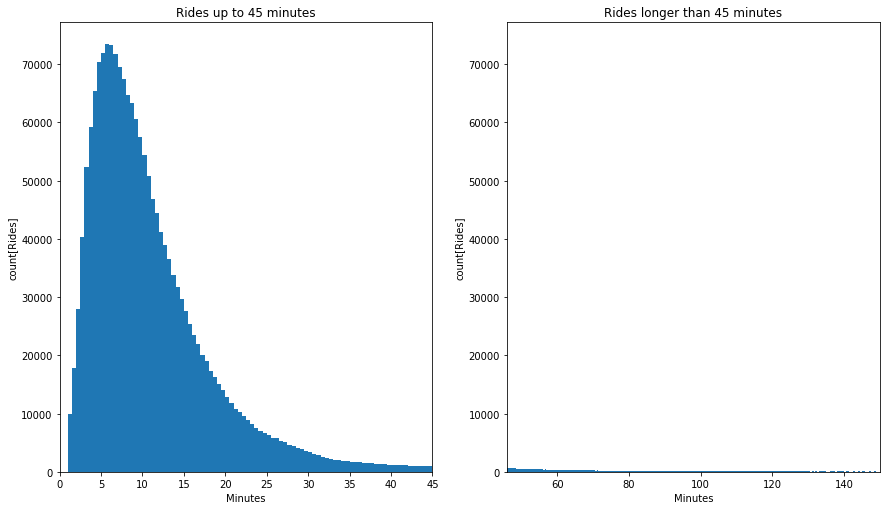

In [29]:
#Rides length duration
plt.figure(figsize=[14.70, 8.27])
binsize=0.5
bins=np.arange(0, fordbyke['duration_min'].max()+binsize, binsize)
plt.subplot(1,2,1)
plt.hist(data = fordbyke, x = 'duration_min', bins=bins);
plt.xlim([0,45])
plt.xlabel('Minutes')
plt.ylabel('count[Rides]')
plt.title('Rides up to 45 minutes');

plt.subplot(1,2,2)
plt.hist(data = fordbyke, x = 'duration_min', bins=bins);
plt.xlim([46,150])
plt.xlabel('Minutes')
plt.ylabel('count[Rides]')
plt.title('Rides longer than 45 minutes');

plt.savefig('5_RidesUpTo45Minutes.png')

**As seen before most of the rides are of duration ranging between 5 to 10 minutes and there are only few rides which have been more than 45 minutes.**

## How is the byke ride usage month wise in 2018?

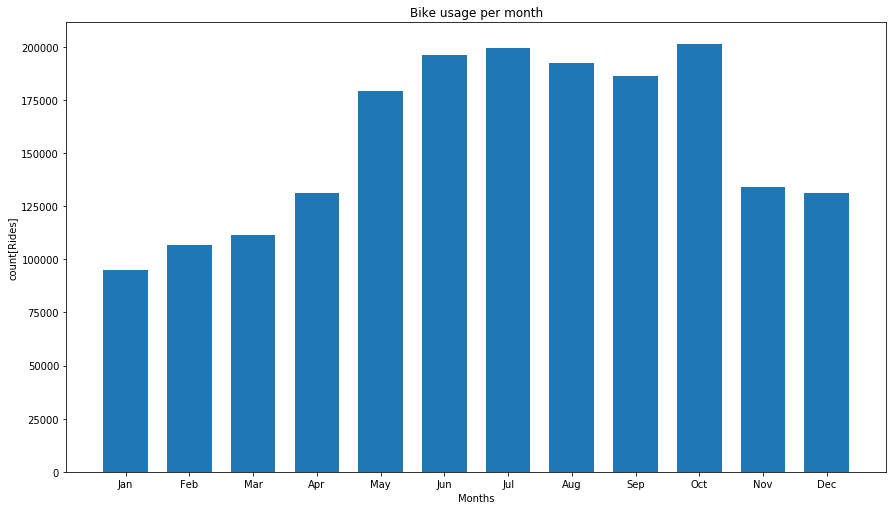

In [30]:
# Byke usgae month wise
plt.figure(figsize=[14.70, 8.27])
bin_edges = np.arange(0.5, 12.5+1, 1)
plt.hist(data = fordbyke, x='st_month', bins=bin_edges, rwidth=0.7  )
months = ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(1, 12+1, 1), months)
plt.xlabel('Months')
plt.ylabel('count[Rides]')
plt.title('Bike usage per month');
plt.savefig('6_BikeUsagepermonth.png')

 **The bike usage is all round the year however it uprises from April and see most of the usage in June and July and as fall approaches the usage trend slows down by the end of October.**

## How are the byke usage hour wise, like when are the busiest hours of the day?

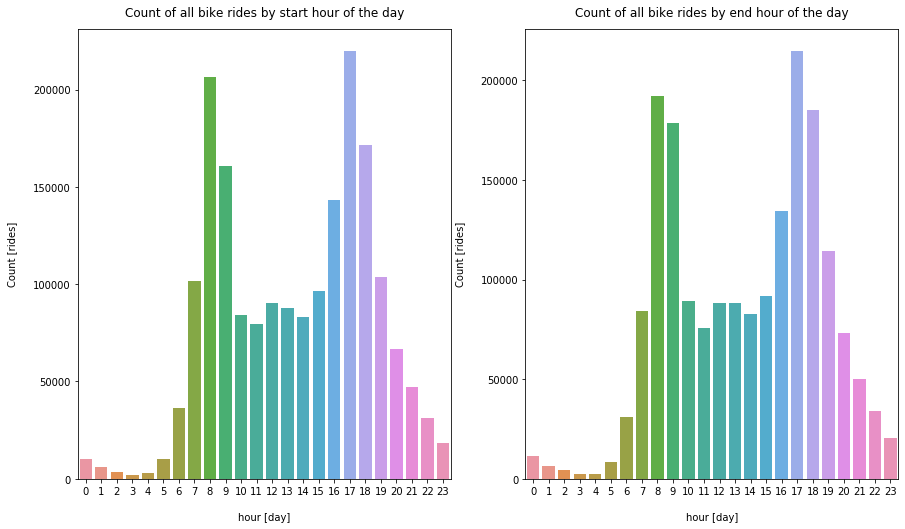

In [31]:
#Byke usage by the hour of the day
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
sb.countplot(x='st_hour', data=fordbyke)
plt.title('Count of all bike rides by start hour of the day', fontsize=12, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('Count [rides]', labelpad=16)
#plt.savefig('image/image07.png');

plt.subplot(1,2,2)
sb.countplot(x='et_hour', data=fordbyke)
plt.title('Count of all bike rides by end hour of the day', fontsize=12, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('Count [rides]', labelpad=16)

plt.savefig('7_bikeridebyhours.png')

**During morning hours byke usage starts trending from 7:00 Am and its the highest during 8:00 AM and 9:00 AM and during evening hours it start trending from 3:00 PM and is maximum between 5:00 PM and 6:00 PM . After 7:00 PM the usage slows down.**

## How long is the usage during weekdays?

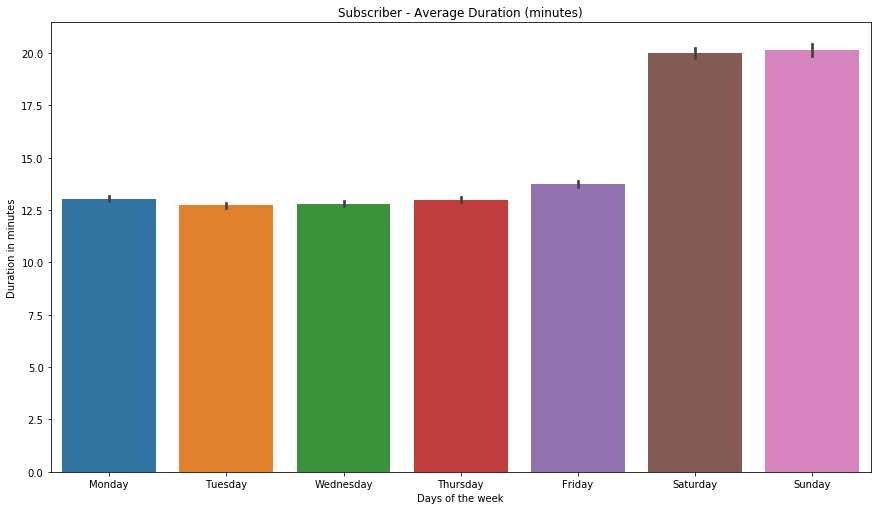

In [32]:
#Byke trends by the weekdays and duration
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data = fordbyke,x='st_weekday', y='duration_min').set_title('Subscriber - Average Duration (minutes)')
plt.xlabel('Days of the week')
plt.ylabel('Duration in minutes')
plt.savefig('8_subscriberavgduration.png')


**On weekends starting from Friday until Sunday people are byking for longer durations approx. around 20 minutes**

## How is the usage by memeber age group?

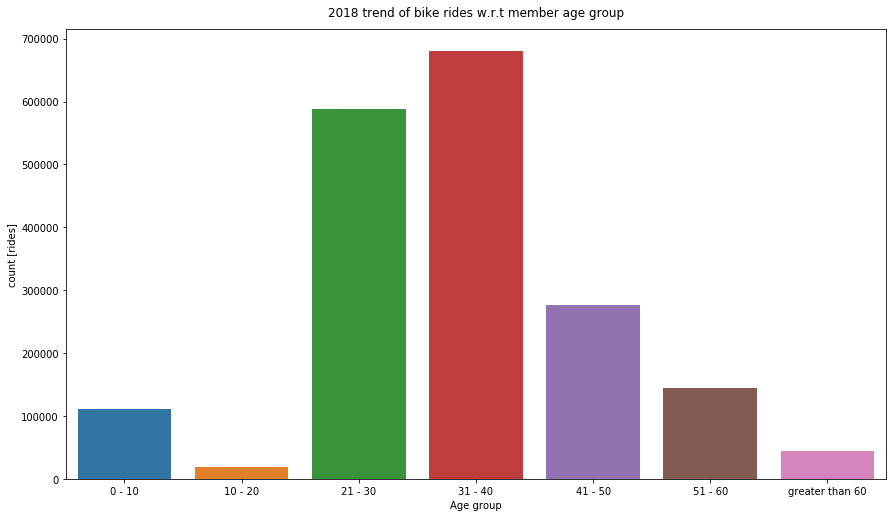

In [33]:
#2018 trend of bike rides w.r.t member age group
plt.figure(figsize=[14.70, 8.27])
ax = sb.countplot(x='age_bin',data=fordbyke)
plt.title("2018 trend of bike rides w.r.t member age group", y=1.015)
plt.xlabel('Age group')
plt.ylabel('count [rides]')
plt.savefig('8_distribution_member_age_group.png')

**This service is most popular among People from the age range 31-40 and then by age range 21-30.**

## How was the monthly trend with respect to age group and subscribers user group?

In [34]:
age_subs_df = fordbyke[fordbyke['user_type']=='Subscriber'].groupby(['start_time_year_month', 'age_bin']).agg({'bike_id':'count'}).reset_index()

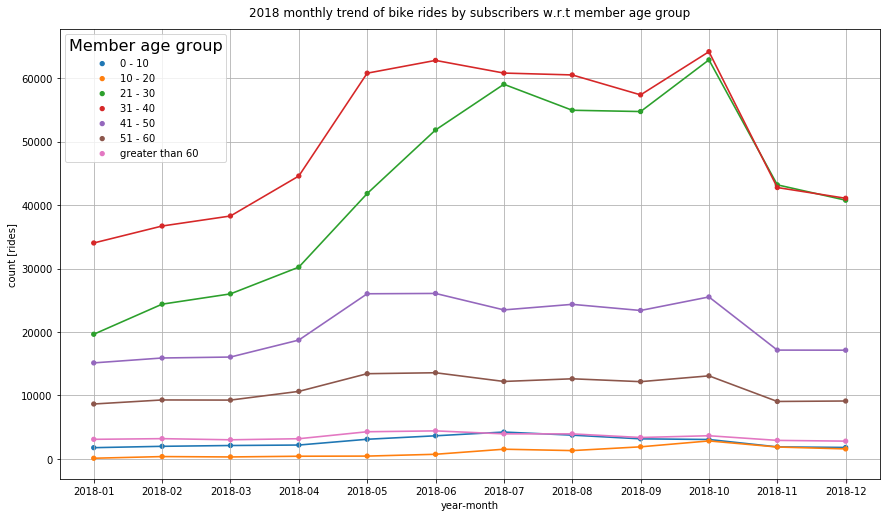

In [35]:
#2018 monthly trend of bike rides by subscribers
plt.figure(figsize=[14.70, 8.27])
ax = sb.pointplot(x='start_time_year_month', y='bike_id', hue='age_bin', 
                  scale=.6, data=age_subs_df)
plt.title("2018 monthly trend of bike rides by subscribers w.r.t member age group", y=1.015)
plt.xlabel('year-month')
plt.ylabel('count [rides]')
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
plt.grid()
plt.savefig('9_subscribers_w.r.t_member_age_group.png')

**Users from age group 21-30 and 31-40 have been the major users and during the months of May, June, July they have shown the highest usage.**

## Which stations are the busiest?

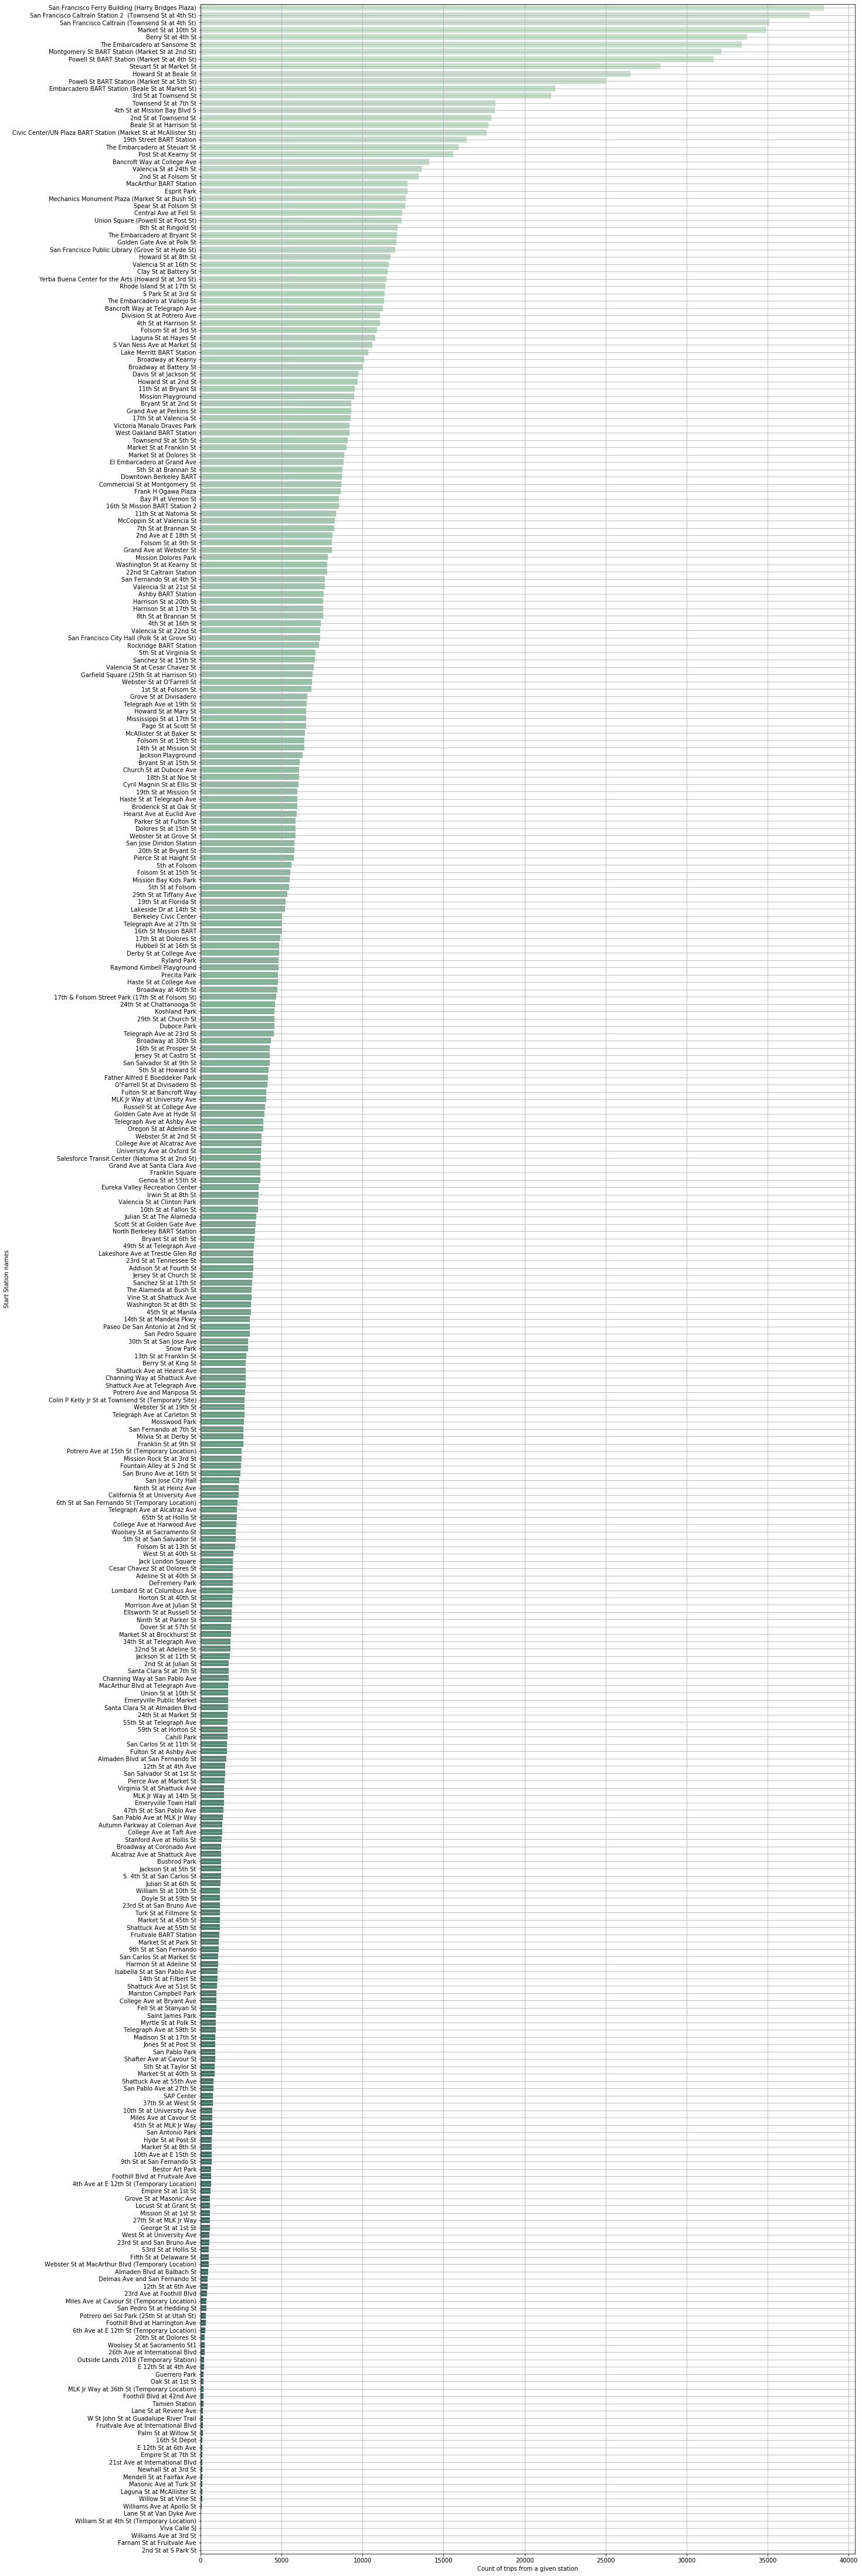

In [36]:
# Popular stations i.e. stations bringing more users 
plt.figure(figsize=(20,80))
data=fordbyke.start_station_name.value_counts()
sb.barplot(y=data.index, x = data, orient='h',palette='ch:2.5,-.2,dark=.3')
plt.xlabel('Count of trips from a given station')
plt.ylabel('Start Station names')
plt.grid()
plt.savefig('10_PopularStartStation.png')

**The most popular and busiest station is San Fransisco Ferry Building**

## How is the usage of byke service (duration in minute) by user_type and Gender wise?

<Figure size 1058.4x595.44 with 0 Axes>

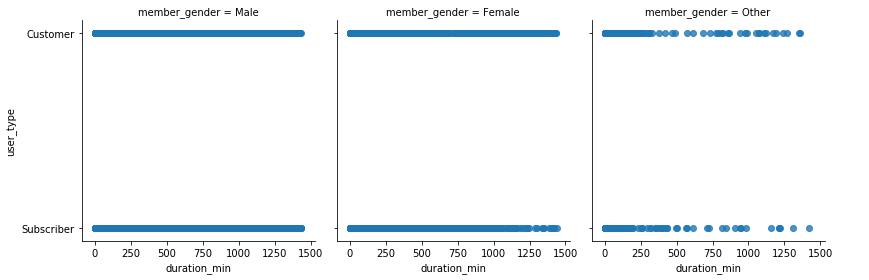

In [39]:
plt.figure(figsize=[14.70, 8.27])
g=sb.FacetGrid(data=fordbyke,col='member_gender',height=4,margin_titles=True)
g.map(sb.regplot,'duration_min','user_type',x_jitter=0.04,fit_reg=False)
g.add_legend()
#
plt.savefig('12_multivariate_plot.png')

**Male Subscribers have been using the bike service for maximum durations as compared to female subscribers and others.**

In [ ]:
! jupyter nbconvert FordGoBike_Trip_Data_exploratoryAnalysis_exp.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook FordGoBike_Trip_Data_exploratoryAnalysis_exp.ipynb to slides
[NbConvertApp] Writing 710247 bytes to FordGoBike_Trip_Data_exploratoryAnalysis_exp.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/FordGoBike_Trip_Data_exploratoryAnalysis_exp.slides.html
Use Control-C to stop this server
